In [3]:
#RUN IMPORTS FIRST!
import numpy as np
import matplotlib.pyplot as plt

# Collatz Conjecture
## An Exploration Into the Concept. Implications and Uses.

### 1.Quick introduction to the idea

#### 1.1.What is the Collatz Conjecture?

The Collatz Conjecture is a simple question: whether repeting two simple arithmethic expressions would eventualy transform any positive integer to 1. These two expressions are as follows:

If the number given is even: divide it by two;
If the number given is odd: triple it and add one.

#### 1.2History of the Concept

The Collatz Conjecture is named after Lothar Collatz, who formulated this idea in 1937 and there have been many students and professors of mathematics throught the years since it was introduced, that have tried to tackle this problem, but to no avail.

For example the Hungarian professor Paul Erdős, who was famous for his own conjectures and a proficient mathematician, responded to Collatz's paper on the subject with "Mathematics may not be ready for such problems." and he also offered a cash prize of 500US$ for anyone who could reach a definitive answer.

![](https://i.pinimg.com/originals/35/1a/42/351a42e114a1cec4da226384aa51da03.jpg)Here is a picture of Lothar Collatz, the mathematician that introduced this concept that still boggles the minds of scientists and hasn't been solved to this day.

### 2.Formulating the Problem Mathematicaly

In order to explore this concept we need to cleary express the Collatz Conjecture, so lets start by defining the arithmetic expressions as the function $f(x)$:

$$ f(x) =
  \begin{cases}
    \frac{x}{2}       & \quad \text{if } x \text{ is even}\\
    3x+1      & \quad \text{if } x \text{ is odd}
  \end{cases}
$$

Now we need to signify that this is to be repeted until the number one is reached. We can do this by forming a sequence:

$$ a_{i} =
  \begin{cases}
    x       & \quad \text{for } i \text{ = 0}\\
    f(a_{i-1})      & \quad \text{for } i \text{ > 0}
  \end{cases}
$$

In this case $a_{i}$ is the value of $f$ applied to $n$ recursively **i** times or $a_{i} = f^i(x)$

The Collatz Conjecture simply states, that this process will eventualy reach the number 1, regardless of which positive integer is chosen initially. If this statement is false for any example, the conjecture is proven to be false, because a sequence has been reached that does not contain 1.

We can also formulate our original $f(x)$, so that the process takes less time:

$$ f_{1}(x) =
  \begin{cases}
    \frac{x}{2}       & \quad \text{if } x \text{ is even}\\
    \frac{3x+1}{2}     & \quad \text{if } x \text{ is odd}
  \end{cases}
$$

This works, because 3x+1 will always reach an even number and so we can use the $\frac{x}{2}$ case on top of it.

### 3.Formulating the Problem with Python

The Collatz Conjecture can be formulated as the following python fuction in order to be used in code:
```python
def collatz(x):
    steps = 0
    while x!=1:
        steps+=1
        if x%2==0:
            x/=2
        else:
            x=3*x+1
    return steps
```
This form of the function returns the ammount of steps that were taken until the integer x reached 1.
We can also change the expression in the else to $x=(3*x+1)/2$ to formulate it as showed in $f_{1}$.

Run this code do define both versions of the conjecture:

In [13]:
def collatz(x):
    #Collatz Conjecture
    steps = 0
    while x!=1:
        steps+=1
        if x%2==0:
            x/=2
        else:
            x=3*x+1
    return steps

def collatz_short(x):
    #Shortened Version of Collatz Conjecture
    steps = 0
    while x!=1:
        steps+=1
        if x%2==0:
            x/=2
        else:
            x=(3*x+1)/2
    return steps

### 4.Simple Experiments with Python

Now that we have our functions, lets plot their results for all natural numbers from 1 to n:

100


<function matplotlib.pyplot.show(close=None, block=None)>

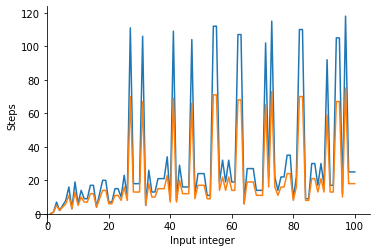

In [14]:
#We can use np.linspace to specify the ammount of tests.
n = input()
#The length and ammount of points is the same because we are looking only at natural numbers
x = np.linspace(1, int(n), int(n))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('Input integer')
ax.set_ylabel('Steps')

func_1 = np.vectorize(collatz)
func_2 = np.vectorize(collatz_short)
plt.plot(x, func_1(x))
plt.plot(x, func_2(x))
plt.show

We can also change our function to plot the path of a specific number, Lets for example take our first large spike in steps - 27 and run in trough:

<function matplotlib.pyplot.show(close=None, block=None)>

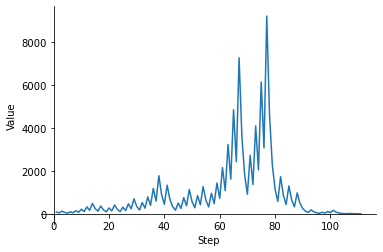

In [15]:
def collatz_unloop(n):
    #We simulate the Conjecture for x = 27 and simply write down the result of that simulation in d
    x = 27
    d = []
    steps = 0
    while x!=1:
        if x%2==0:
            x/=2
        else:
            x=3*x+1
        d.append(x)
        steps+=1
    return d[int(n-1)]

x = np.linspace(1, 111, 111)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('Step')
ax.set_ylabel('Value')

func = np.vectorize(collatz_unloop)
plt.plot(x, func(x))
plt.show

As the graph shows the progression of 27 towards 1 takes 111 steps, reaching as high as 9232 at one point before descending back to 1. Lets express this progression of 27 with the conjecture as the array d:

$$d =[27, 82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]$$

### 5.Supporting Data and Arguments

Even though there is no definitive proof that neither confirms nor denies the conjecture, scientists strongly lean to it being true, because of experimental data and heuristic statements.

#### 5.1.Experimental Data 

As of 2022 a computer has checked all starting values up to $2^{68}$. All values checked end in the loop (4,2,1), which contains the number 1. This ususaly is enough data to disprove a conjecture, but since there hasnt been found any number where the conjecture is false that might mean that it is true, but this isn't definitive proof.

#### 5.2.Stopping Times

In 1976 Riho Terras proved, that almost every positive integer has a finite stopping time or, in other words, dispite its inital value, the integer eventualy reaches a point below its initial value, which in term would result in the median of the points to slowly lower until, in theory, it reaches 1.

#### 5.3.A Generalised Heuristic

Lets take our array d and strip all even numbers. What we are left with is the following array:

$$d =[27, 41, 31, 47, 71, 107, 161, 121, 91, 137, 103, 155, 233, 175, 263, 395, 593, 445, 167, 251, 377, 283, 425, 319, 479, 719, 1079, 1619, 2429, 911, 1367, 2051, 3077, 577, 433, 325, 61, 23, 35, 53, 5, 1]$$

From here we can plot these numbers:

<function matplotlib.pyplot.show(close=None, block=None)>

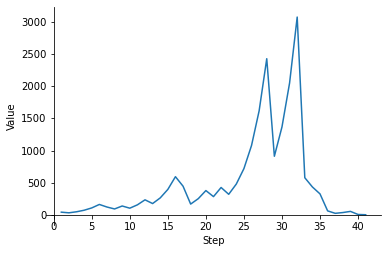

In [16]:
def take_value(x):
    d = [27, 41, 31, 47, 71, 107, 161, 121, 91, 137, 103, 155, 233, 175, 263, 395, 593, 445, 167, 251, 377, 283, 425, 319, 479, 719, 1079, 1619, 2429, 911, 1367, 2051, 3077, 577, 433, 325, 61, 23, 35, 53, 5, 1]
    return d[int(x)]

x = np.linspace(1, 41, 41)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('Step')
ax.set_ylabel('Value')

func = np.vectorize(take_value)
plt.plot(x, func(x))
plt.show

Now that looks similar to our collatz function of 27, but there is something we can derive from this function.

If we take the proprotion from step to step(comparing neighbouring values) and finds is meadian we would see that the value poduced is close to  $\frac{3}{4}$

Here is a python script to calculate this:

In [6]:
d = np.array([27, 41, 31, 47, 71, 107, 161, 121, 91, 137, 103, 155, 233, 175, 263, 395, 593, 445, 167, 251, 377, 283, 425, 319, 479, 719, 1079, 1619, 2429, 911, 1367, 2051, 3077, 577, 433, 325, 61, 23, 35, 53, 5, 1])

value = np.diff(d)
average = sum(value)/len(value)
print("{0:.2f}".format(-average))

0.63


Altough the value poduced here is 0.63, based on experimentation with other numbers this number tends to lean to $\frac{3}{4}$, which in turn means that on average the value tends to get lower.

### 6.Ways to Visualise Collatz Conjecture

In order to express Collatz Conjecture we must take into account that during processing of differnet integers they may converge in certain numbers, as if two different integers reach the same number they continue on an identical path.

The most-readable way is with a plot-chart. Here is a simple example:

![](https://www.researchgate.net/profile/Frank-Emmert-Streib/publication/235691921/figure/fig2/AS:667856429662227@1536240789739/Collatz-sequences-and-Collatz-graph-Left-Examples-of-Collatz-sequences-C-n-for-the.png)

All of the data is clearly expressed and you can clearly identfy different paths and convergents. The problem with this design is that it cannot contain a lot of data, because it can get out of hand fast:

![](https://www.dedoimedo.com/images/physics/collatz-tree.png)

Now you might find it hard to differenciate the values and that is the problem with this method. Altough intuitive, it is not good for studies and statistical research, but one interesting side effect is what happens when instead of controlling this graph we let it generate itself and give it a bit of moving room:

![](https://miro.medium.com/max/445/0*m4baUaM9S7DIFGku.png)

A beautiful graph resembeling a tree. Interesting how from the most bogged down arithmetic we still reached something so natural.

If you want to experiment with this graph and see it generate itself in real time, download the app Processing - https://processing.org and open the file CollatzTree.pde in the resources folder of the project.

Another way to express the conjecture is through a more circular type of graph:

![](https://www.jasondavies.com/collatz-graph/collatz.png)

While sill not the best, we have the opportunity to fit more detailed information on such a graph, but mathematicians prefer expressing such data as derivative from a function or as a pure algebra, because of the flexabiliy that this concept requires.

### 7.Expanding the Domain of the Input

By now we have tested the Collatz Conjecture for all natural numbers for 1 to 100, but what if we increase the scope of the domain. For exaple, what would happen if we were to introduce negative numbers or matbe even complex numbers.

#### 7.1.Introducing More Integers

When we introduce all negative natural numbres into the domain, insted of there being one loop where we say we end the progression, three more are introduced (four if you include the loop $0 \rightarrow 0$):

$1:[-1 \rightarrow -2 \rightarrow -1]$ Length : 2

$2:[-5 \rightarrow -14 \rightarrow -7 \rightarrow -20 \rightarrow -10 \rightarrow -5]$ Length : 5

$3:[-17 \rightarrow -50 \rightarrow -25 \rightarrow -74 \rightarrow -37 \rightarrow -110 \rightarrow -55 \rightarrow 164 \rightarrow -82 \rightarrow -41 \rightarrow -122 \rightarrow -61 \rightarrow -182 \rightarrow -91 \rightarrow -272 \rightarrow -136 \rightarrow -68 \rightarrow -34 \rightarrow -17]$ Length : 18

With the original being:$[1 \rightarrow 4 \rightarrow 2 \rightarrow 1]$ Length : 3

Altough negative integers never reach 1, the generalized version of Collatz Conjecture is considered true if any of the following loops is reached. As with positive integers, all numbers as low as $-2^{64}$ have already been tested. 

#### 7.2.Introducing rationals with odd denominators

Here we aren't talking specificaly about the Collatz Conjecture, but insted about the Periodicy Conjecturee, which states that the same two arithmetic functions can bring any odd rational into a prarity sequence or ,in other words, an iteration loop such as the ones shown above.

In order to see this we need to undertand what is considered an odd rational. The defenition is, for simplicity, any rational in its lowest form, that has an odd number as a denominator. These rationals are iterated on according to their numerator: if it is "even" the rational gets halved, it is "odd" it gets tripled and one is added to it(its the value to its denumenator to its numerator). For example the number $\frac{2}{3}$ works with this definition.

#### 7.3.Introducing real or complex numbers

Now here comes something interesting. The shortened version of Collatz Conjecture can be interpreted as the restriction of the integers of the smooth map (The derivative that determines the smoothness of a function) and can be formulated as such:

$$f(z) = \frac{1}{2}z\cos^2(\frac{\pi}{2}z)+\frac{3z+1}{2}\sin^2(\frac{\pi}{2}z)$$

Iterating on this map leads to a dynamic system. The resulting system contains no positive real numbers, because there are infinitely many fixed points, as well as infinitely expanding sequences. 

This was expanded upon in the following years until the "Collatz Fractal" was discovered, derived from the Julia set of $f$:

![](http://njohnston.ca/wp-content/uploads/2009/06/collatz.png)

### Summary

The Collatz Conjecture is one of the most fascinating simple problems in maths that no one can solve, altough scientists have made some significant breakthroughh on the subject in recent years that may change that fact or maybe the invention of the quantum computer or the first advanced AI will mark the end of the uncertanty about the conjecture, but we can only wonder. 

### Sources

[Wikipedia - The information on the website kicked off my research but I also reviewed several papers on the subject.](https://en.wikipedia.org/wiki/Collatz_conjecture#Other_formulations_of_the_conjecture)

[Paper on Proving Collatz Conjecture: Mohamed Azzedine, Nishad T. M.](https://www.researchgate.net/publication/355900683_Mathematical_Proof_of_Collatz_Conjecture)

[Paper on behaviour of iterations of the Collatz Conjecture with rationals: Terence Tao](https://terrytao.wordpress.com/2019/09/10/almost-all-collatz-orbits-attain-almost-bounded-values/)

[A lot of info on the problem and details on uses of the problem: Marc Chamberland](https://chamberland.math.grinnell.edu/papers/3x_survey_eng.pdf)

[Link to the book "Experimental Mathematics, Volume 8, Issue 1" which details the entire problem.](https://www.tandfonline.com/toc/uexm20/8/1)

[Information on "Collatz Fractal"](https://yozh.org/2012/01/12/the_collatz_fractal/)